# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer
from time import time

# Przydatne funkcje 

In [4]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [5]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [6]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

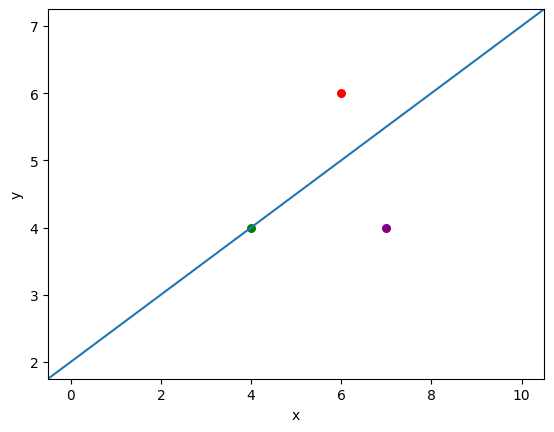

In [7]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [8]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    points = []
    for i in range(n):
        x = np.random.uniform(left,right,1)[0]
        y = np.random.uniform(left,right,1)[0]
        points.append((x,y))
    return points

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [9]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

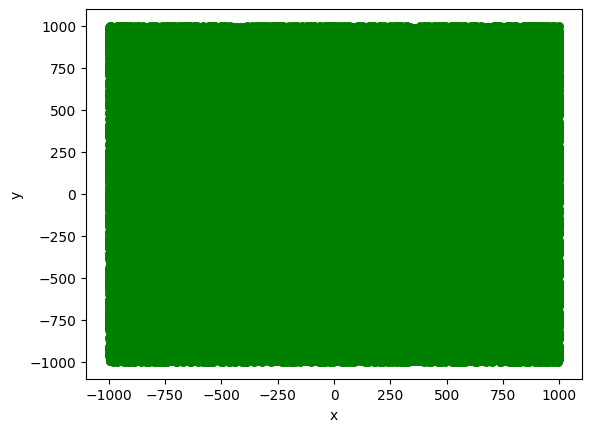

In [10]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [11]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

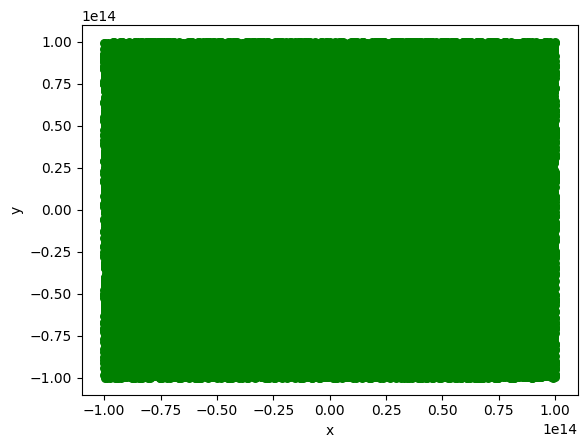

In [12]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [13]:
def generate_circle_points(O, R, n = 1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    points = []

    for i in range(n):
        t = np.random.uniform(0,4,1)[0]
        x = O[0] + R * np.cos((np.pi/2)*t)
        y = O[1] + R * np.sin((np.pi/2)*t)
        points.append((x,y))
    return points

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [14]:
points_c = generate_circle_points((0, 0), 100)

Zwizualizuj wygenerowane punkty.

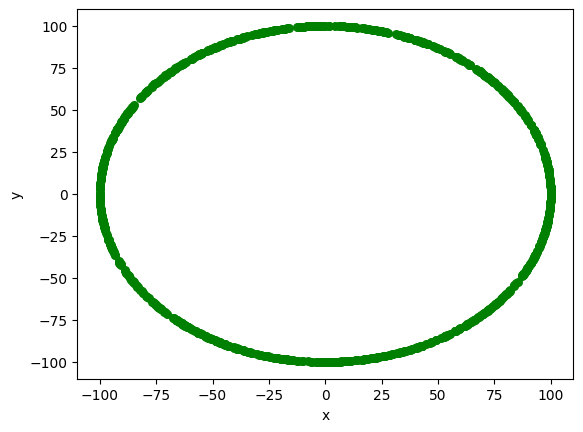

In [15]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [16]:
def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    points = []

    coe_a = (a[1]-b[1])/(a[0]-b[0])
    coe_b = a[1] - coe_a*a[0]
    for i in range(n):
        x = np.random.uniform(a[0],b[0],1)[0]
        y = coe_a*x + coe_b
        points.append((x,y))
    
    return points

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [17]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

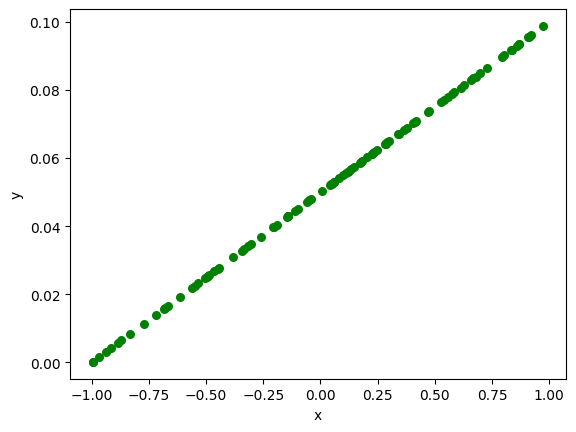

In [18]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [19]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: 

Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 1.688s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [217]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """

    return a[0] * b[1] * 1 + a[1] * c[0] + b[0]*c[1] - c[0]*b[1] - b[0]*a[1] - a[0]*c[1]

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [21]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """

    matrix = np.array([[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]])
    
    return np.linalg.det(matrix)

Uzupełnij funkcje ```mat_det_2x2```

In [22]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """

    return (a[0]-c[0])*(b[1]-c[1]) - (a[1]-c[1])*(b[0]-c[0])

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [23]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """

    matrix = np.array([[a[0]-c[0],a[1]-c[1]],[b[0]-c[0],b[1]-c[1]]])
    return np.linalg.det(matrix)

Przetestujmy napisane powyżej funkcje.

In [24]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [222]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """

    left_points = []
    on_straight = []
    right_points = []

    for point in points:
        det = mat_det_func(a,b,point)
        if abs(det) < eps:
            on_straight.append(point)
        elif det < 0:
            right_points.append(point)
        else:
            left_points.append(point)
    
    return left_points,on_straight,right_points

In [26]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

Zbiór A

In [27]:
classified_points_a_left = [0 for _ in range(16)]
classified_points_a_mid = [0 for _ in range(16)]
classified_points_a_right = [0 for _ in range(16)]

mat_det_3x3

In [223]:
start = time()
classified_points_a_left[0],classified_points_a_mid[0],classified_points_a_right[0] = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)
print(time()-start)

0.1319746971130371


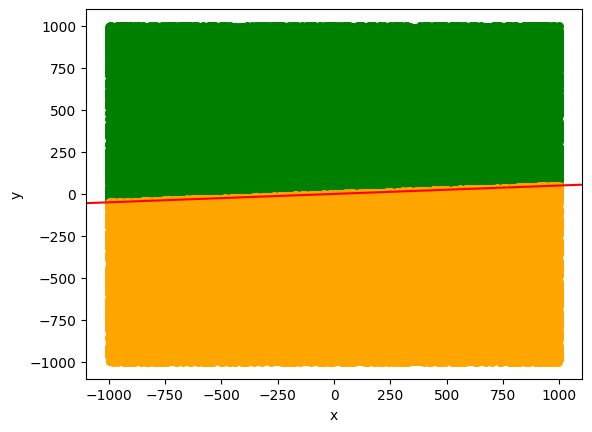

In [224]:
draw_line(classified_points_a_left[0], classified_points_a_mid[0], classified_points_a_right[0])

In [216]:
print(classified_points_a_left[1][5])
print(mat_det_3x3(a,b,classified_points_a_left[1][5]))

(337.66260065800316, -752.8804645605733)
-1539.627189186947


Eps 10 ** -10

In [225]:
start = time()
classified_points_a_left[1],classified_points_a_mid[1],classified_points_a_right[1] = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -10)
print(time()-start)

0.11939334869384766


eps 10 ** -14

In [226]:
start = time()
classified_points_a_left[2],classified_points_a_mid[2],classified_points_a_right[2] = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -14)
print(time()-start)

0.1264362335205078


eps 10 ** -18

In [227]:
start = time()
classified_points_a_left[3],classified_points_a_mid[3],classified_points_a_right[3] = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -18)
print(time()-start)

0.1283552646636963


zmiana funkcji liczącej wyznacznik na mat_det_3x3_lib

In [228]:
start = time()
classified_points_a_left[4],classified_points_a_mid[4],classified_points_a_right[4] = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -12)
print(time()-start)

0.6603653430938721


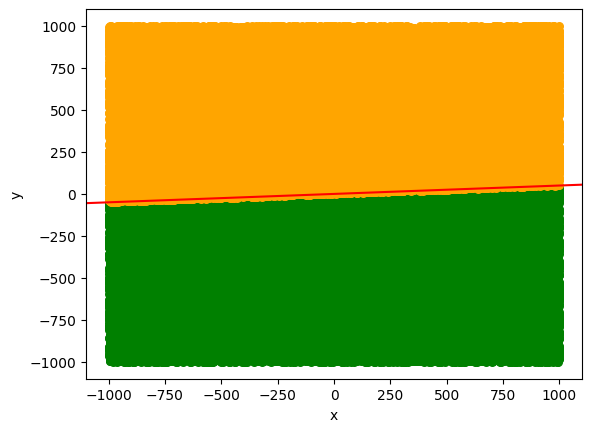

In [157]:
draw_line(classified_points_a_left[4], classified_points_a_mid[4], classified_points_a_right[4])

eps 10 ** -10

In [229]:
start = time()
classified_points_a_left[5],classified_points_a_mid[5],classified_points_a_right[5] = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -10)
print(time()-start)

0.655332088470459


eps 10 ** -14

In [230]:
start = time()
classified_points_a_left[6],classified_points_a_mid[6],classified_points_a_right[6] = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -14)
print(time()-start)

0.6729099750518799


eps 10 ** -18

In [231]:
start = time()
classified_points_a_left[7],classified_points_a_mid[7],classified_points_a_right[7] = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -18)
print(time()-start)

0.6577050685882568


zmiana funkcji liczącej wyznacznik na mat_det_2x2

In [232]:
start = time()
classified_points_a_left[8],classified_points_a_mid[8],classified_points_a_right[8] = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -12)
print(time()-start)

0.09939098358154297


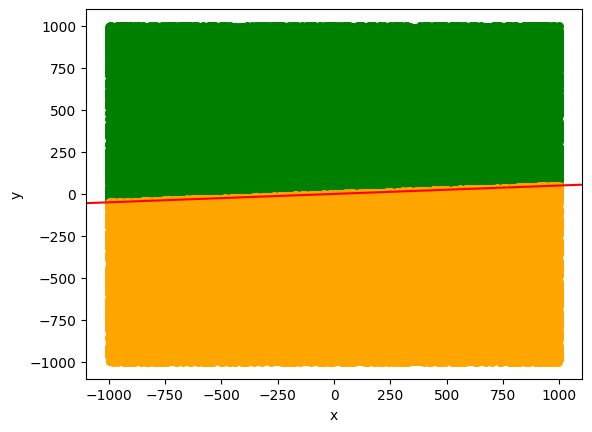

In [233]:
draw_line(classified_points_a_left[8], classified_points_a_mid[8], classified_points_a_right[8])

eps 10 ** -10

In [234]:
start = time()
classified_points_a_left[9],classified_points_a_mid[9],classified_points_a_right[9] = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -10)
print(time()-start)

0.09378290176391602


eps 10 ** -14

In [235]:
start = time()
classified_points_a_left[10],classified_points_a_mid[10],classified_points_a_right[10] = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -14)
print(time()-start)

0.1008448600769043


eps 10 ** -18

In [236]:
start = time()
classified_points_a_left[11],classified_points_a_mid[11],classified_points_a_right[11] = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -10)
print(time()-start)

0.09796833992004395


zmiana funkcji liczącej wyznacznik na mat_det_2x2_lib

In [237]:
start = time()
classified_points_a_left[12],classified_points_a_mid[12],classified_points_a_right[12] = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -12)
print(time()-start)

0.6159775257110596


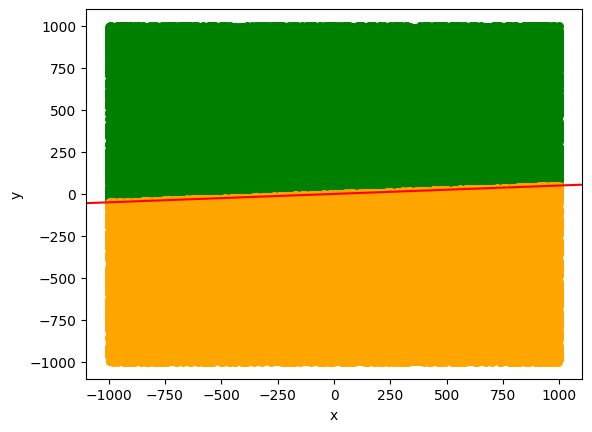

In [238]:
draw_line(classified_points_a_left[12], classified_points_a_mid[12], classified_points_a_right[12])

eps 10 ** -10

In [239]:
start = time()
classified_points_a_left[13],classified_points_a_mid[13],classified_points_a_right[13] = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -10)
print(time()-start)

0.6283767223358154


eps 10 ** -14

In [240]:
start = time()
classified_points_a_left[14],classified_points_a_mid[14],classified_points_a_right[14] = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -14)
print(time()-start)

0.6232485771179199


eps 10 ** -18

In [241]:
start = time()
classified_points_a_left[15],classified_points_a_mid[15],classified_points_a_right[15] = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -16)
print(time()-start)

0.6493856906890869


Analiza wyników zbioru 10 ^ 5 punktów w przedziale -1000 do 1000

In [242]:
print("Zbiór A:")
mat = ("mat_det_3x3 ","mat_det_3x3_lib ","mat_det_2x2 ","mat_det_2x2_lib ")
eps = ("eps 10^-12","eps 10^-10","eps 10^-14","eps 10^-18")
for i in range(4):
    print(mat[i])
    for j in range(4):
        print(eps[j])
        print("Po lewej stronie prostej %a, na prostej %a, po prawej stronie prostej %a." % (len(classified_points_a_left[i*4+j]), len(classified_points_a_mid[i*4+j]),len(classified_points_a_right[i*4+j])))

Zbiór A:
mat_det_3x3 
eps 10^-12
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
eps 10^-10
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
eps 10^-14
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
eps 10^-18
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
mat_det_3x3_lib 
eps 10^-12
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
eps 10^-10
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
eps 10^-14
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
eps 10^-18
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
mat_det_2x2 
eps 10^-12
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
eps 10^-10
Po lewej stronie prostej 49872, na prostej 0, po prawej stronie prostej 50128.
eps 10^-14
Po lewej stronie prostej 49872, na pr

Ile punktów zmieniło położenie: Stawiamy tezę, która mówi, że żaden punkt nie zmienił położenia.
Sprawdzamy tezę.

In [243]:
print("Zbiór A:")
mat = ("mat_det_3x3 ","mat_det_3x3_lib ","mat_det_2x2 ","mat_det_2x2_lib ")
eps = ("eps 10^-12","eps 10^-10","eps 10^-14","eps 10^-18")
flag = False
for i in range(4):
    for j in range(3):
        if classified_points_a_left[i*4+j] != classified_points_a_left[i*4+3]:
            print("Punkt zmienił położenie.")

print("Żaden punkt nie zmienił położenia")
    
    

Zbiór A:
Żaden punkt nie zmienił położenia


Zbiór B

In [50]:
classified_points_b_left = [0 for _ in range(16)]
classified_points_b_mid = [0 for _ in range(16)]
classified_points_b_right = [0 for _ in range(16)]

mat_det_3x3

In [244]:
start = time()
classified_points_b_left[0],classified_points_b_mid[0],classified_points_b_right[0] = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -12)
print(time()-start)

0.15584230422973633


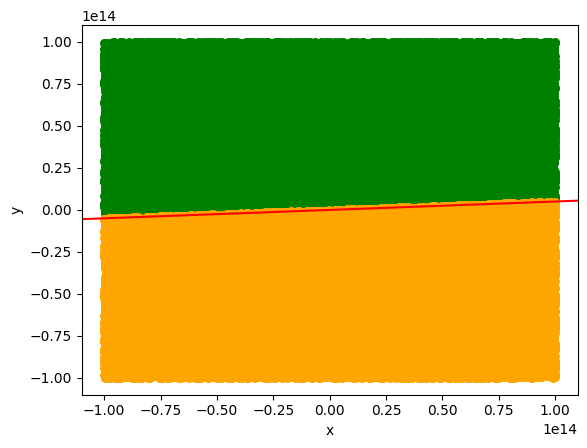

In [245]:
draw_line(classified_points_b_left[0], classified_points_b_mid[0], classified_points_b_right[0])

eps 10^-10

In [246]:
start = time()
classified_points_b_left[1],classified_points_b_mid[1],classified_points_b_right[1] = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -10)
print(time()-start)

0.12584400177001953


eps 10^-14

In [247]:
start = time()
classified_points_b_left[2],classified_points_b_mid[2],classified_points_b_right[2] = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -14)
print(time()-start)

0.12512755393981934


eps 10^-18

In [248]:
start = time()
classified_points_b_left[3],classified_points_b_mid[3],classified_points_b_right[3] = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -18)
print(time()-start)

0.1208949089050293


mat_det_3x3_lib

In [249]:
start = time()
classified_points_b_left[4],classified_points_b_mid[4],classified_points_b_right[4] = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)
print(time()-start)

0.6705753803253174


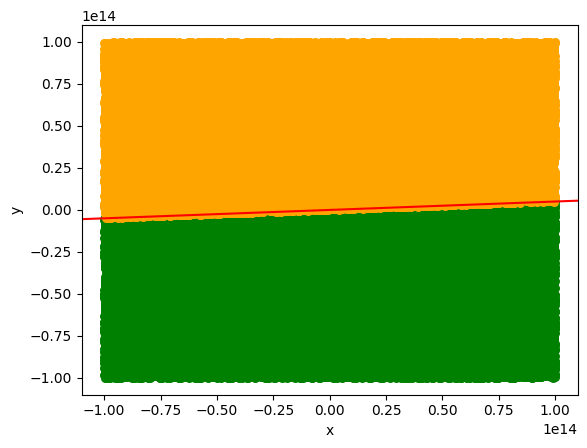

In [179]:
draw_line(classified_points_b_left[4], classified_points_b_mid[4], classified_points_b_right[4])

eps 10^-10

In [250]:
start = time()
classified_points_b_left[5],classified_points_b_mid[5],classified_points_b_right[5] = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -10)
print(time()-start)

0.663377046585083


eps 10^-14

In [251]:
start = time()
classified_points_b_left[6],classified_points_b_mid[6],classified_points_b_right[6] = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -14)
print(time()-start)

0.6617443561553955


eps 10^-18

In [252]:
start = time()
classified_points_b_left[7],classified_points_b_mid[7],classified_points_b_right[7] = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -18)
print(time()-start)

0.6903855800628662


mat_det_2x2

In [253]:
start = time()
classified_points_b_left[8],classified_points_b_mid[8],classified_points_b_right[8] = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -12)
print(time()-start)

0.0985114574432373


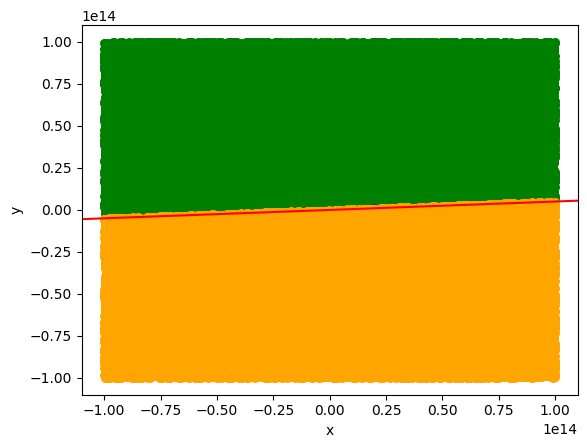

In [254]:
draw_line(classified_points_b_left[8], classified_points_b_mid[8], classified_points_b_right[8])

eps 10^-10

In [270]:
start = time()
classified_points_b_left[9],classified_points_b_mid[9],classified_points_b_right[9] = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -10)
print(time()-start)

0.09680986404418945


eps 10^-14

In [255]:
start = time()
classified_points_b_left[10],classified_points_b_mid[10],classified_points_b_right[10] = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -14)
print(time()-start)

0.09907889366149902


eps 10^-18

In [256]:
start = time()
classified_points_b_left[11],classified_points_b_mid[11],classified_points_b_right[11] = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -12)
print(time()-start)

0.10011529922485352


mat_det_2x2_lib

In [257]:
start = time()
classified_points_b_left[12],classified_points_b_mid[12],classified_points_b_right[12] = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -12)
print(time()-start)

0.6218676567077637


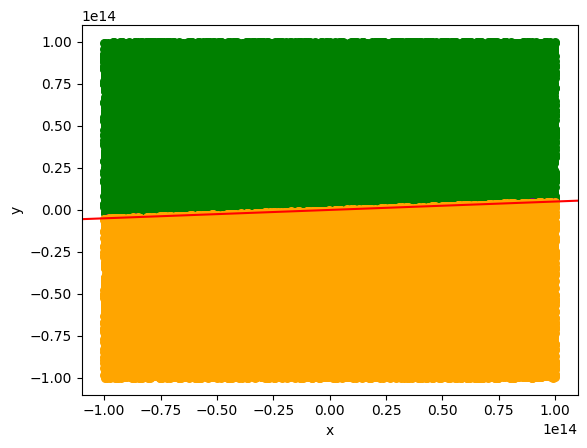

In [258]:
draw_line(classified_points_b_left[12], classified_points_b_mid[12], classified_points_b_right[12])

eps 10^-10

In [268]:
start = time()
classified_points_b_left[13],classified_points_b_mid[13],classified_points_b_right[13] = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -10)
print(time()-start)

0.6294729709625244


eps 10^-14

In [265]:
start = time()
classified_points_b_left[14],classified_points_b_mid[14],classified_points_b_right[14] = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -14)
print(time()-start)

0.6180248260498047


eps 10^-18

In [262]:
start = time()
classified_points_b_left[15],classified_points_b_mid[15],classified_points_b_right[15] = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -18)
print(time()-start)

0.622856855392456


Analiza wyników zbioru B

In [271]:
print("Zbiór B:")
mat = ("mat_det_3x3 ","mat_det_3x3_lib ","mat_det_2x2 ","mat_det_2x2_lib ")
eps = ("eps 10^-12","eps 10^-10","eps 10^-14","eps 10^-18")
for i in range(4):
    print(mat[i])
    for j in range(4):
        print(eps[j])
        print("Po lewej stronie prostej %a, na prostej %a, po prawej stronie prostej %a." % (len(classified_points_b_left[i*4+j]), len(classified_points_b_mid[i*4+j]),len(classified_points_b_right[i*4+j])))

Zbiór B:
mat_det_3x3 
eps 10^-12
Po lewej stronie prostej 50067, na prostej 0, po prawej stronie prostej 49933.
eps 10^-10
Po lewej stronie prostej 50067, na prostej 0, po prawej stronie prostej 49933.
eps 10^-14
Po lewej stronie prostej 50067, na prostej 0, po prawej stronie prostej 49933.
eps 10^-18
Po lewej stronie prostej 50067, na prostej 0, po prawej stronie prostej 49933.
mat_det_3x3_lib 
eps 10^-12
Po lewej stronie prostej 50067, na prostej 0, po prawej stronie prostej 49933.
eps 10^-10
Po lewej stronie prostej 50067, na prostej 0, po prawej stronie prostej 49933.
eps 10^-14
Po lewej stronie prostej 50067, na prostej 0, po prawej stronie prostej 49933.
eps 10^-18
Po lewej stronie prostej 50067, na prostej 0, po prawej stronie prostej 49933.
mat_det_2x2 
eps 10^-12
Po lewej stronie prostej 50065, na prostej 4, po prawej stronie prostej 49931.
eps 10^-10
Po lewej stronie prostej 50065, na prostej 4, po prawej stronie prostej 49931.
eps 10^-14
Po lewej stronie prostej 50065, na pr

Sprawdzamy czy punkty przy wyznaczniku 3x3 są tymi samymi punktami

In [72]:
for i in range(4):
    if classified_points_b_left[i] != classified_points_b_left[i+4]:
        print("zmiana punktów")
print("to te same punkty")

to te same punkty


Zobaczmy jakie punkty znajdują się na prostej przy wyznaczniku 2x2

In [73]:
print("mat_det_2x2")
for i in range(1,4):
    if classified_points_b_mid[8] != classified_points_b_mid[8+i]:
        print("zmiana punktów")
print(classified_points_b_mid[8])
print("mat_det_2x2_lib")
for i in range(1,4):
    if classified_points_b_mid[12] != classified_points_b_mid[12+i]:
        print("zmiana punktów")
print(classified_points_b_mid[12])

mat_det_2x2
[(30357125740135.797, 1521710624246.4844), (19638529973194.86, 981961870813.2812), (-85786359919537.95, -4298401840312.5312), (74375862738809.53, 3716366648779.5)]
mat_det_2x2_lib
[(-98351650000821.25, -4880045114506.328), (99342059319891.53, 4978678056272.141), (-85786359919537.95, -4298401840312.5312), (89586524299228.03, 4452273430701.0)]


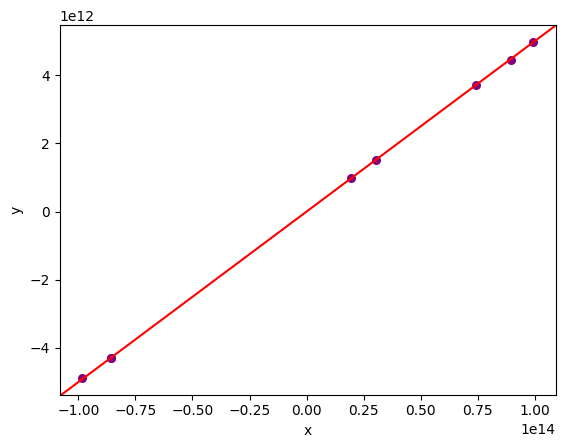

In [193]:
draw_line([],classified_points_b_mid[8]+classified_points_b_mid[12],[])

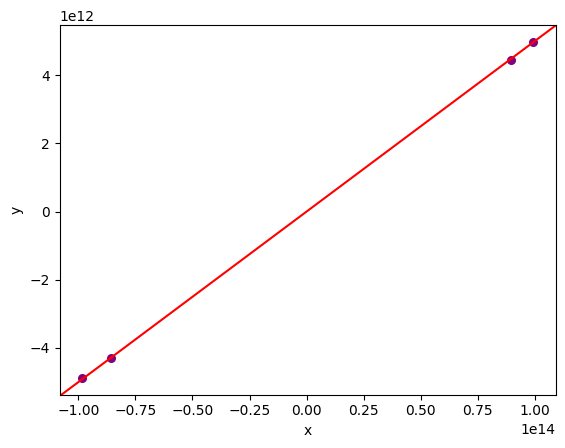

In [75]:
draw_line([],classified_points_b_mid[12],[])

Zbiór C

In [76]:
classified_points_c_left = [0 for _ in range(16)]
classified_points_c_mid = [0 for _ in range(16)]
classified_points_c_right = [0 for _ in range(16)]

mat_det_3x3

eps 10^-12

In [272]:
classified_points_c_left[0],classified_points_c_mid[0],classified_points_c_right[0] = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -12)

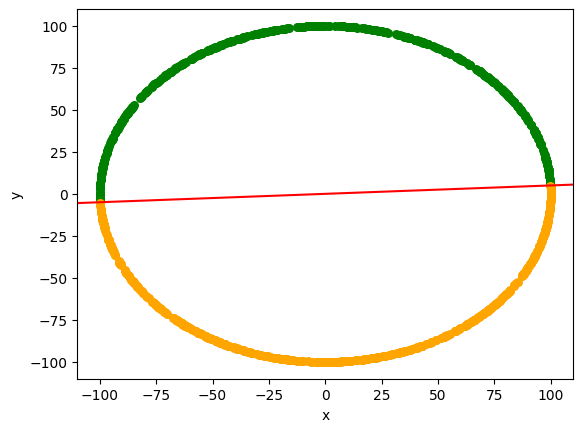

In [273]:
draw_line(classified_points_c_left[0], classified_points_c_mid[0], classified_points_c_right[0])

eps 10^-10

In [274]:
classified_points_c_left[1],classified_points_c_mid[1],classified_points_c_right[1] = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -10)

eps 10^-14

In [275]:
classified_points_c_left[2],classified_points_c_mid[2],classified_points_c_right[2] = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -14)

eps 10^-18

In [276]:
classified_points_c_left[3],classified_points_c_mid[3],classified_points_c_right[3] = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -18)

mat_det_3x3_lib

eps 10^-12

In [277]:
classified_points_c_left[4],classified_points_c_mid[4],classified_points_c_right[4] = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -12)

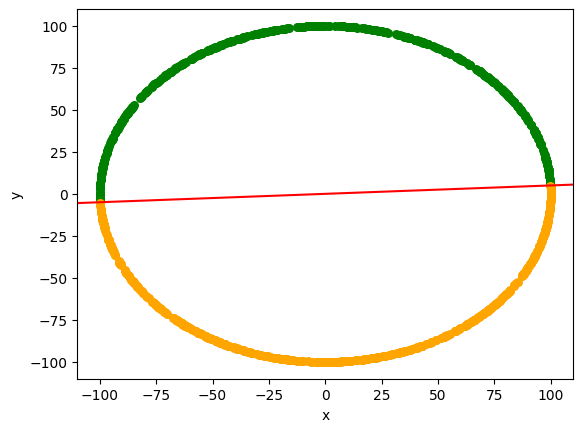

In [278]:
draw_line(classified_points_c_left[4], classified_points_c_mid[4], classified_points_c_right[4])

eps 10^-10

In [279]:
classified_points_c_left[5],classified_points_c_mid[5],classified_points_c_right[5] = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -10)

eps 10^-14

In [280]:
classified_points_c_left[6],classified_points_c_mid[6],classified_points_c_right[6] = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -14)

eps 10^-18

In [281]:
classified_points_c_left[7],classified_points_c_mid[7],classified_points_c_right[7] = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -18)

mat_det_2x2

eps 10^-12

In [282]:
classified_points_c_left[8],classified_points_c_mid[8],classified_points_c_right[8] = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

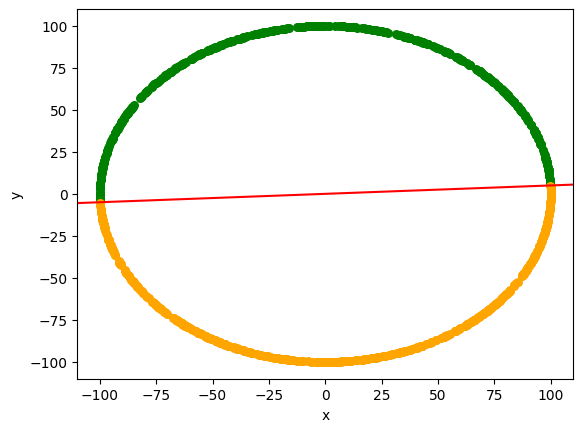

In [283]:
draw_line(classified_points_c_left[8], classified_points_c_mid[8], classified_points_c_right[8])

eps 10^-10

In [284]:
classified_points_c_left[9],classified_points_c_mid[9],classified_points_c_right[9] = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -10)

eps 10^-14

In [285]:
classified_points_c_left[10],classified_points_c_mid[10],classified_points_c_right[10] = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -14)

eps 10^-18

In [286]:
classified_points_c_left[11],classified_points_c_mid[11],classified_points_c_right[11] = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -18)

mat_det_2x2_lib

eps 10^-12

In [287]:
classified_points_c_left[12],classified_points_c_mid[12],classified_points_c_right[12] = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -12)

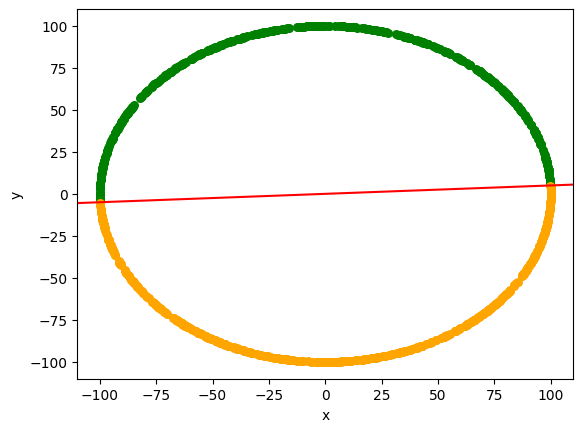

In [288]:
draw_line(classified_points_c_left[12], classified_points_c_mid[12], classified_points_c_right[12])

eps 10^-10

In [289]:
classified_points_c_left[13],classified_points_c_mid[13],classified_points_c_right[13] = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -10)

eps 10^-14

In [290]:
classified_points_c_left[14],classified_points_c_mid[14],classified_points_c_right[14] = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -14)

eps 10^-18

In [291]:
classified_points_c_left[15],classified_points_c_mid[15],classified_points_c_right[15] = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -18)

Analiza wyników zbioru C

In [292]:
print("Zbiór C:")
mat = ("mat_det_3x3 ","mat_det_3x3_lib ","mat_det_2x2 ","mat_det_2x2_lib ")
eps = ("eps 10^-12","eps 10^-10","eps 10^-14","eps 10^-18")
for i in range(4):
    print(mat[i])
    for j in range(4):
        print(eps[j])
        print("Po lewej stronie prostej %a, na prostej %a, po prawej stronie prostej %a." % (len(classified_points_c_left[i*4+j]), len(classified_points_c_mid[i*4+j]),len(classified_points_c_right[i*4+j])))

Zbiór C:
mat_det_3x3 
eps 10^-12
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
eps 10^-10
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
eps 10^-14
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
eps 10^-18
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
mat_det_3x3_lib 
eps 10^-12
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
eps 10^-10
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
eps 10^-14
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
eps 10^-18
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
mat_det_2x2 
eps 10^-12
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
eps 10^-10
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
eps 10^-14
Po lewej stronie prostej 480, na prostej 0, po prawej stronie prostej 520.
ep

W przypadkach mat_det_3x3_lib, mat_det_2x2 i mat_det_2x2 nic się nie zmienia sprawdźmy czy to te same punkty

In [293]:
for i in range(4):
    if classified_points_c_left[4+i] != classified_points_c_left[8+i] or classified_points_c_left[4+i] != classified_points_c_left[12+i] or classified_points_c_left[4+i] != classified_points_c_left[i]:
        print("zmiana położenia punktu")
print("brak zmiany")

brak zmiany


Zbiór D

In [106]:
classified_points_d_left = [0 for _ in range(16)]
classified_points_d_mid = [0 for _ in range(16)]
classified_points_d_right = [0 for _ in range(16)]

mat_det_3x3

eps 10^-12

In [294]:
classified_points_d_left[0],classified_points_d_mid[0],classified_points_d_right[0] = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -12)

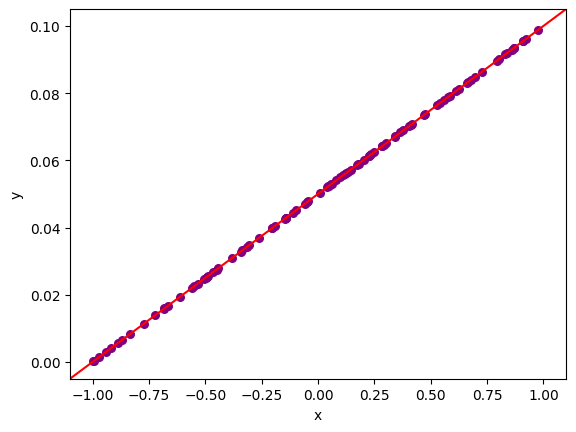

In [295]:
draw_line(classified_points_d_left[0], classified_points_d_mid[0], classified_points_d_right[0])

eps 10^-10

In [109]:
classified_points_d_left[1],classified_points_d_mid[1],classified_points_d_right[1] = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -10)

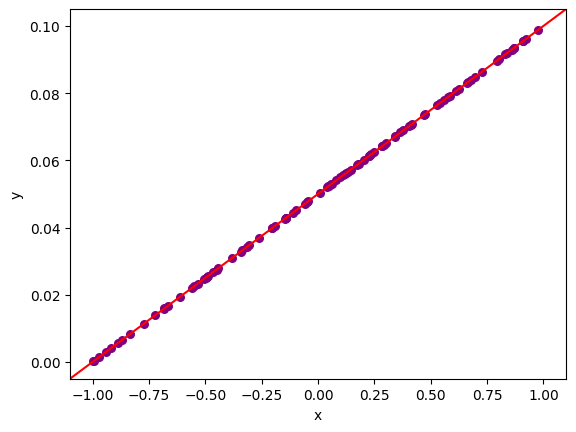

In [110]:
draw_line(classified_points_d_left[1], classified_points_d_mid[1], classified_points_d_right[1])

eps 10^-14

In [111]:
classified_points_d_left[2],classified_points_d_mid[2],classified_points_d_right[2] = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -14)

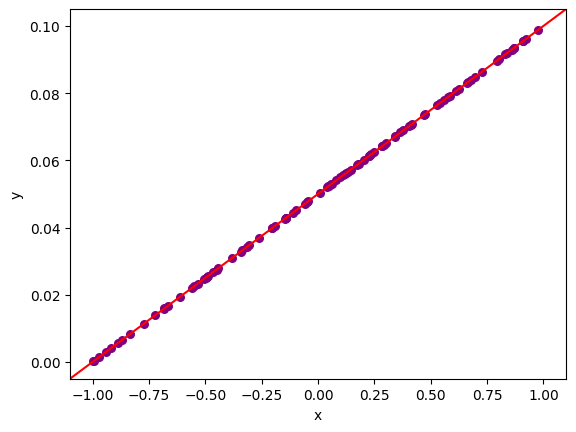

In [112]:
draw_line(classified_points_d_left[2], classified_points_d_mid[2], classified_points_d_right[2])

eps 10^-18

In [296]:
classified_points_d_left[3],classified_points_d_mid[3],classified_points_d_right[3] = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -18)

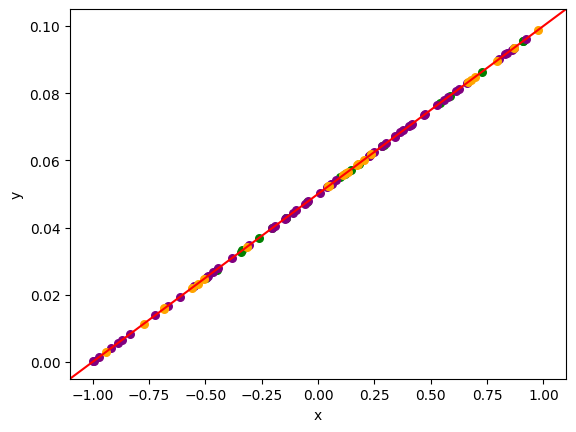

In [297]:
draw_line(classified_points_d_left[3], classified_points_d_mid[3], classified_points_d_right[3])

mat_det_3x3_lib

eps 10^-12

In [123]:
classified_points_d_left[4],classified_points_d_mid[4],classified_points_d_right[4] = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -12)

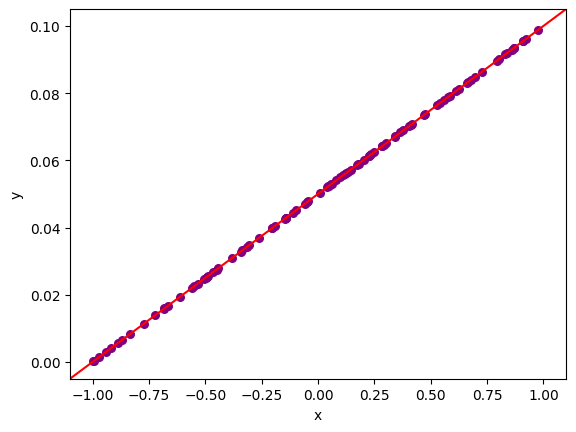

In [124]:
draw_line(classified_points_d_left[4], classified_points_d_mid[4], classified_points_d_right[4])

eps 10^-10

In [125]:
classified_points_d_left[5],classified_points_d_mid[5],classified_points_d_right[5] = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -10)

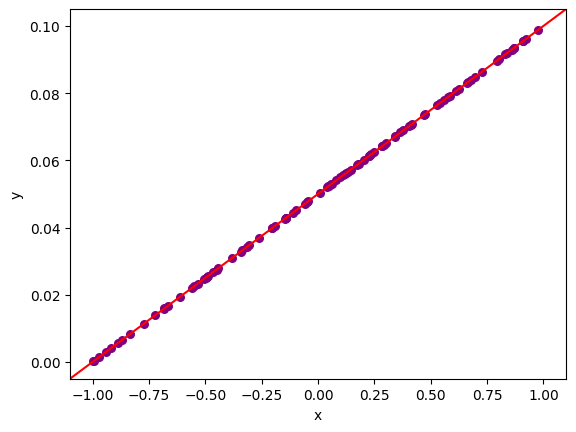

In [126]:
draw_line(classified_points_d_left[5], classified_points_d_mid[5], classified_points_d_right[5])

eps 10^-14

In [127]:
classified_points_d_left[6],classified_points_d_mid[6],classified_points_d_right[6] = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -14)

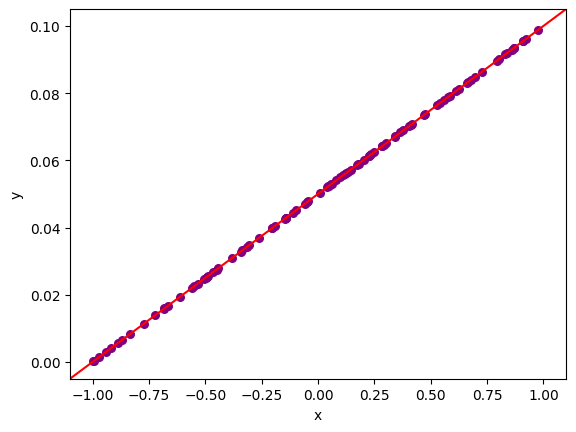

In [128]:
draw_line(classified_points_d_left[6], classified_points_d_mid[6], classified_points_d_right[6])

eps 10^-18

In [129]:
classified_points_d_left[7],classified_points_d_mid[7],classified_points_d_right[7] = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -18)

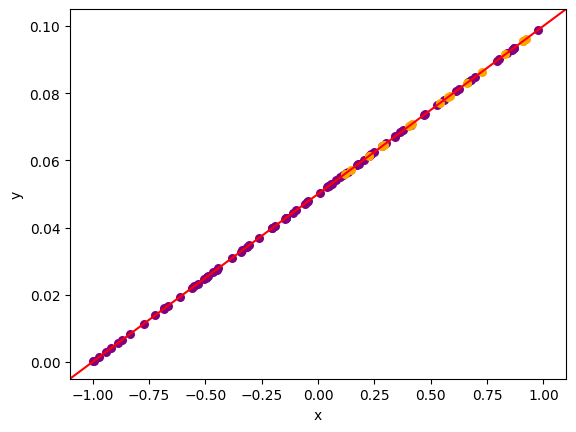

In [298]:
draw_line(classified_points_d_left[7], classified_points_d_mid[7], classified_points_d_right[7])

mat_det_2x2

eps 10^-12

In [131]:
classified_points_d_left[8],classified_points_d_mid[8],classified_points_d_right[8] = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -12)

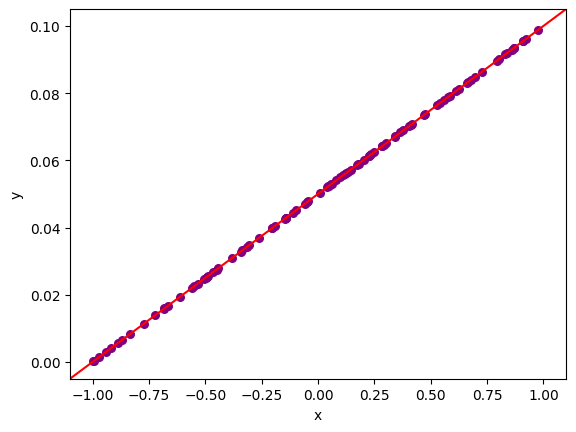

In [132]:
draw_line(classified_points_d_left[8], classified_points_d_mid[8], classified_points_d_right[8])

eps 10^-10

In [133]:
classified_points_d_left[9],classified_points_d_mid[9],classified_points_d_right[9] = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -10)

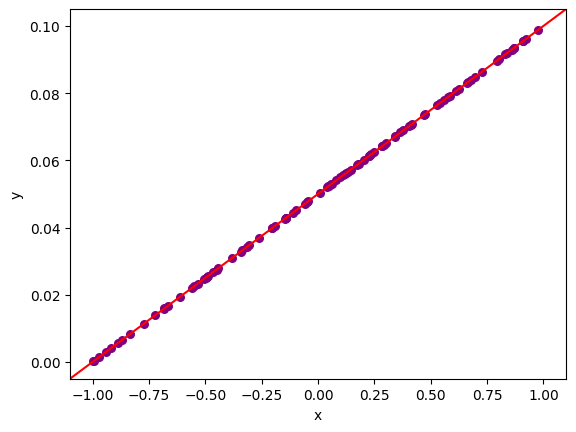

In [134]:
draw_line(classified_points_d_left[9], classified_points_d_mid[9], classified_points_d_right[9])

eps 10^-14

In [135]:
classified_points_d_left[10],classified_points_d_mid[10],classified_points_d_right[10] = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -14)

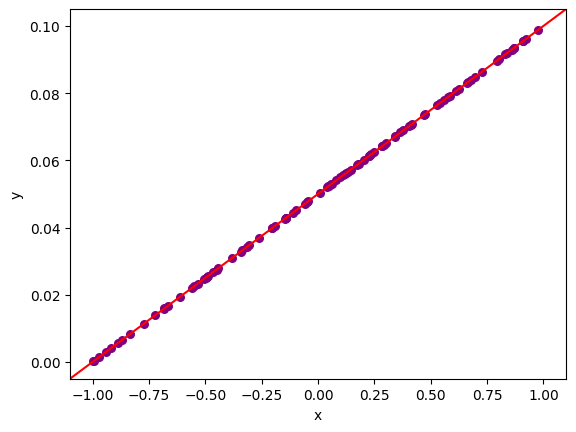

In [136]:
draw_line(classified_points_d_left[10], classified_points_d_mid[10], classified_points_d_right[10])

eps 10^-18

In [299]:
classified_points_d_left[11],classified_points_d_mid[11],classified_points_d_right[11] = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -18)

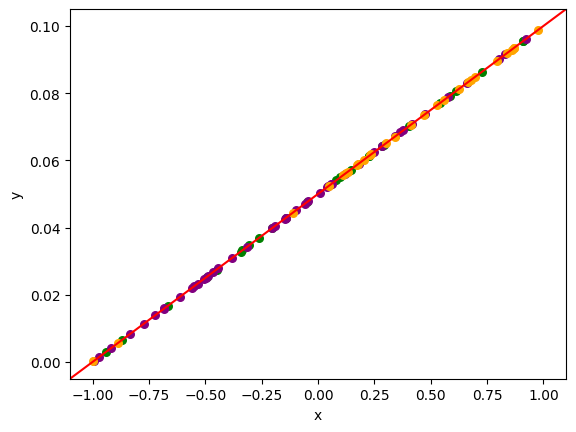

In [300]:
draw_line(classified_points_d_left[11], classified_points_d_mid[11], classified_points_d_right[11])

mat_det_2x2_lib

eps 10^-12

In [139]:
classified_points_d_left[12],classified_points_d_mid[12],classified_points_d_right[12] = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

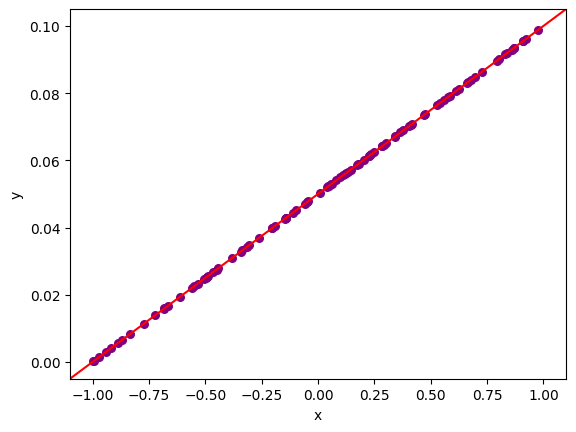

In [140]:
draw_line(classified_points_d_left[12], classified_points_d_mid[12], classified_points_d_right[12])

eps 10^-10

In [141]:
classified_points_d_left[13],classified_points_d_mid[13],classified_points_d_right[13] = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -10)

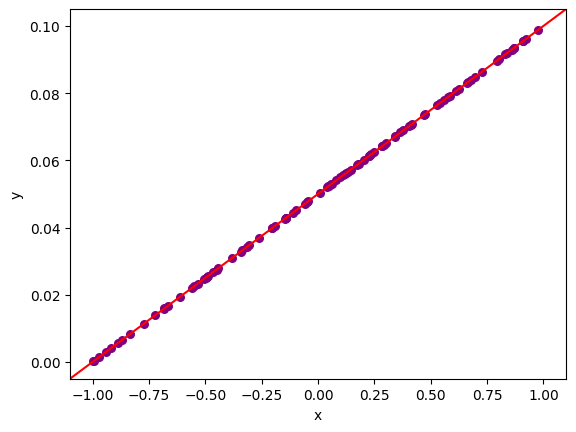

In [142]:
draw_line(classified_points_d_left[13], classified_points_d_mid[13], classified_points_d_right[13])

eps 10^-14

In [143]:
classified_points_d_left[14],classified_points_d_mid[14],classified_points_d_right[14] = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -14)

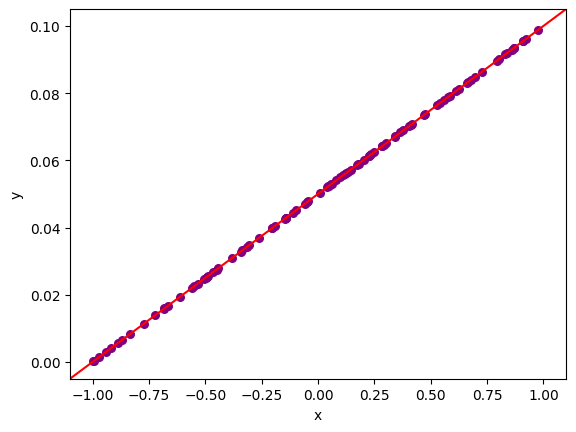

In [144]:
draw_line(classified_points_d_left[14], classified_points_d_mid[14], classified_points_d_right[14])

eps 10^-18

In [302]:
classified_points_d_left[15],classified_points_d_mid[15],classified_points_d_right[15] = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -18)

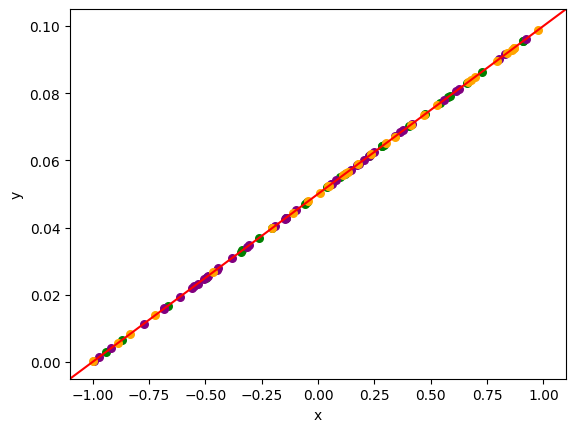

In [303]:
draw_line(classified_points_d_left[15], classified_points_d_mid[15], classified_points_d_right[15])

Analiza wyników zbioru D

In [304]:
print("Zbiór D:")
mat = ("mat_det_3x3 ","mat_det_3x3_lib ","mat_det_2x2 ","mat_det_2x2_lib ")
eps = ("eps 10^-12","eps 10^-10","eps 10^-14","eps 10^-18")
for i in range(4):
    print(mat[i])
    for j in range(4):
        print(eps[j])
        print("Po lewej stronie prostej %a, na prostej %a, po prawej stronie prostej %a." % (len(classified_points_d_left[i*4+j]), len(classified_points_d_mid[i*4+j]),len(classified_points_d_right[i*4+j])))

Zbiór D:
mat_det_3x3 
eps 10^-12
Po lewej stronie prostej 0, na prostej 100, po prawej stronie prostej 0.
eps 10^-10
Po lewej stronie prostej 0, na prostej 100, po prawej stronie prostej 0.
eps 10^-14
Po lewej stronie prostej 0, na prostej 100, po prawej stronie prostej 0.
eps 10^-18
Po lewej stronie prostej 20, na prostej 57, po prawej stronie prostej 23.
mat_det_3x3_lib 
eps 10^-12
Po lewej stronie prostej 0, na prostej 100, po prawej stronie prostej 0.
eps 10^-10
Po lewej stronie prostej 0, na prostej 100, po prawej stronie prostej 0.
eps 10^-14
Po lewej stronie prostej 0, na prostej 100, po prawej stronie prostej 0.
eps 10^-18
Po lewej stronie prostej 1, na prostej 83, po prawej stronie prostej 16.
mat_det_2x2 
eps 10^-12
Po lewej stronie prostej 0, na prostej 100, po prawej stronie prostej 0.
eps 10^-10
Po lewej stronie prostej 0, na prostej 100, po prawej stronie prostej 0.
eps 10^-14
Po lewej stronie prostej 0, na prostej 100, po prawej stronie prostej 0.
eps 10^-18
Po lewej str

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [104]:
points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.
